In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from glob import glob

from tqdm import tqdm

print(tf.__version__)

2.3.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
from google.colab import files
src = list(files.upload().values())[0]
open('mylib.py','wb').write(src)
import mylib

Saving methods.py to methods.py


In [9]:
from methods import *

In [3]:
simulations_path = '/content/gdrive/My Drive/powerfactory_files/RMS_FULL_26_Processed/RMS_FULL_26_Processed'
bin_path = '/content/gdrive/My Drive/powerfactory_files/RMS_FULL_26_Processed/bin_calc'
data_path = '/content/gdrive/My Drive/powerfactory_files/RMS_FULL_26_Processed/bin'

In [4]:
files = glob(simulations_path +"/26*.csv")

In [5]:
#getting column names and file shapes
columns = pd.read_csv(next(iter(files)), index_col=0)
columns = columns.iloc[:, 2:]
n_rows = columns.shape[0]
n_cols = columns.shape[1]
columns = columns.columns
#print(next(iter(files)))
#print(columns)
#print("Number of rows: " + str(n_rows))
#print("Number of columns: " + str(n_cols))

In [6]:
data = np.load(data_path + '/data.npy')

In [10]:
#splitting the data into train, validation and test sets 70%, 20%, 10%
split_index = len(data)

train = data[0:int(split_index*0.7)]
val = data[int(split_index*0.7):int(split_index*0.9)]
test = data[int(split_index*0.9):]

print("train_df has shape: " + str(train.shape))
print("val_df has shape: " + str(val.shape))
print("test_df has shape: " + str(test.shape))

train_df has shape: (839, 500, 59)
val_df has shape: (240, 500, 59)
test_df has shape: (120, 500, 59)


In [11]:
#normalising the data, from methods.py - normalise
train_df, val_df, test_df = normalise_zero_mean(train, val, test)

In [12]:
#getting feature/label column and and indices
FEATURE_COLUMNS, FEATURE_COLUMN_INDICES = get_feature_or_label_columns_and_indices(columns, None, end_index=45)
LABEL_COLUMNS, LABEL_COLUMN_INDICES = get_feature_or_label_columns_and_indices(columns, 45, end_index=None)

In [13]:
test_noise_1 = test_df.copy()
test_noise_2 = test_df.copy()
test_noise_3 = test_df.copy()
test_noise_4 = test_df.copy()
test_noise_5 = test_df.copy()
rnd=np.random.RandomState(72)

In [14]:
#adding gaussian noise to all test set features

test_noise_1[:,:,:45] += (rnd.randn(120, 500, 45)*0.1)
test_noise_2[:,:,:45] += (rnd.randn(120, 500, 45)*0.1)*2
test_noise_3[:,:,:45] += (rnd.randn(120, 500, 45)*0.1)*4
test_noise_4[:,:,:45] += (rnd.randn(120, 500, 45)*0.1)*6
test_noise_5[:,:,:45] += (rnd.randn(120, 500, 45)*0.1)*8

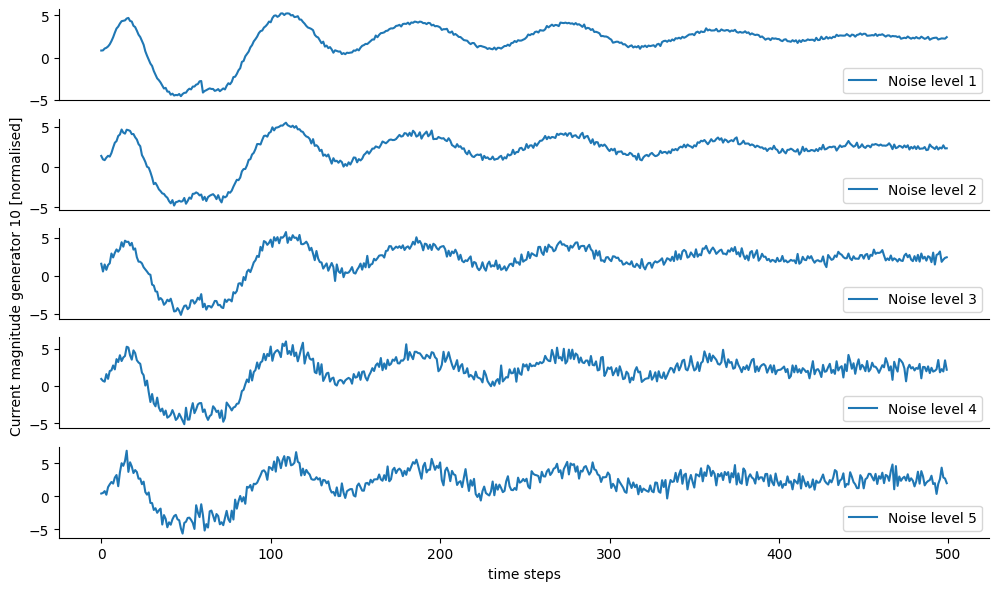

In [15]:
fig, ax = plt.subplots(5,figsize=(12, 7), dpi=100)

ax[0].plot(test_noise_1[0,:,15], label='Noise level 1')
ax[1].plot(test_noise_2[0,:,15], label='Noise level 2')
ax[2].plot(test_noise_3[0,:,15], label='Noise level 3')
ax[3].plot(test_noise_4[0,:,15], label='Noise level 4')
ax[4].plot(test_noise_5[0,:,15], label='Noise level 5')

for axis in ax[0:4]:
  axis.set_xticks([])

for axis in ax:
  axis.legend()

for axis in ax:
  axis.spines['right'].set_visible(False)
  axis.spines['top'].set_visible(False)

fig.text(0.09, 0.5, 'Current magnitude generator 10 [normalised]', ha='center', va='center', rotation='vertical')
ax[4].set_xlabel('time steps')

plt.show()

In [16]:
start_index=0
end_index=None
look_back=30
look_forward=20
step=1

X_test = []
Y_test = []
X_test_noise_1 = []
Y_test_noise_1 = []
X_test_noise_2 = []
Y_test_noise_2 = []
X_test_noise_3 = []
Y_test_noise_3 = []
X_test_noise_4 = []
Y_test_noise_4 = []
X_test_noise_5 = []
Y_test_noise_5 = []

for simulation in tqdm(range(len(test_df))):
  x_test, y_test = get_window(test_df[simulation], start_index, look_back, look_forward,
                      step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                      label_columns=LABEL_COLUMNS)
  
  X_test.append(x_test)
  Y_test.append(y_test)

for simulation in tqdm(range(len(test_noise_2))):
  x_test_test_noise_2, y_test_test_noise_2 = get_window(test_noise_2[simulation], start_index, look_back, look_forward,
                                              step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                                              label_columns=LABEL_COLUMNS)
  
  X_test_noise_2.append(x_test_test_noise_2)
  Y_test_noise_2.append(y_test_test_noise_2)

for simulation in tqdm(range(len(test_noise_3))):
  x_test_test_noise_3, y_test_test_noise_3 = get_window(test_noise_3[simulation], start_index, look_back, look_forward,
                                              step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                                              label_columns=LABEL_COLUMNS)
  
  X_test_noise_3.append(x_test_test_noise_3)
  Y_test_noise_3.append(y_test_test_noise_3)

for simulation in tqdm(range(len(test_noise_4))):
  x_test_test_noise_4, y_test_test_noise_4 = get_window(test_noise_4[simulation], start_index, look_back, look_forward,
                                              step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                                              label_columns=LABEL_COLUMNS)
  
  X_test_noise_4.append(x_test_test_noise_4)
  Y_test_noise_4.append(y_test_test_noise_4)

for simulation in tqdm(range(len(test_noise_5))):
  x_test_test_noise_5, y_test_test_noise_5 = get_window(test_noise_5[simulation], start_index, look_back, look_forward,
                                              step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                                              label_columns=LABEL_COLUMNS)
  
  X_test_noise_5.append(x_test_test_noise_5)
  Y_test_noise_5.append(y_test_test_noise_5)

for simulation in tqdm(range(len(test_noise_1))):
  x_test_test_noise_1, y_test_test_noise_1 = get_window(test_noise_1[simulation], start_index, look_back, look_forward,
                                              step, columns, end_index=None, feature_columns=FEATURE_COLUMNS, 
                                              label_columns=LABEL_COLUMNS)
  
  X_test_noise_1.append(x_test_test_noise_1)
  Y_test_noise_1.append(y_test_test_noise_1)



X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)
X_test_noise_1 = np.concatenate(X_test_noise_1)
Y_test_noise_1 = np.concatenate(Y_test_noise_1)
X_test_noise_2 = np.concatenate(X_test_noise_2)
Y_test_noise_2 = np.concatenate(Y_test_noise_2)
X_test_noise_3 = np.concatenate(X_test_noise_3)
Y_test_noise_3 = np.concatenate(Y_test_noise_3)
X_test_noise_4 = np.concatenate(X_test_noise_4)
Y_test_noise_4 = np.concatenate(Y_test_noise_4)
X_test_noise_5 = np.concatenate(X_test_noise_5)
Y_test_noise_5 = np.concatenate(Y_test_noise_5)


print("X_test shape is: " +str(X_test.shape))
print("Y_test shape is: " +str(Y_test.shape))
print("X_test_noise_1 shape is: " +str(X_test_noise_1.shape))
print("Y_test_noise_1 shape is: " +str(Y_test_noise_1.shape))
print("X_test_noise_2 shape is: " +str(X_test_noise_2.shape))
print("Y_test_noise_2 shape is: " +str(Y_test_noise_2.shape))
print("X_test_noise_3 shape is: " +str(X_test_noise_3.shape))
print("Y_test_noise_3 shape is: " +str(Y_test_noise_3.shape))
print("X_test_noise_4 shape is: " +str(X_test_noise_4.shape))
print("Y_test_noise_4 shape is: " +str(Y_test_noise_4.shape))
print("X_test_noise_5 shape is: " +str(X_test_noise_5.shape))
print("Y_test_noise_5 shape is: " +str(Y_test_noise_5.shape))

100%|██████████| 120/120 [00:05<00:00, 20.60it/s]


X_test shape is: (54000, 30, 45)
Y_test shape is: (54000, 20, 14)
X_test_noise_1 shape is: (54000, 30, 45)
Y_test_noise_1 shape is: (54000, 20, 14)
X_test_noise_2 shape is: (54000, 30, 45)
Y_test_noise_2 shape is: (54000, 20, 14)
X_test_noise_3 shape is: (54000, 30, 45)
Y_test_noise_3 shape is: (54000, 20, 14)
X_test_noise_4 shape is: (54000, 30, 45)
Y_test_noise_4 shape is: (54000, 20, 14)
X_test_noise_5 shape is: (54000, 30, 45)
Y_test_noise_5 shape is: (54000, 20, 14)


In [17]:
BUFFER_SIZE = 1000
BATCH_SIZE = 16

test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test = test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_noise_1 = tf.data.Dataset.from_tensor_slices((X_test_noise_1, Y_test_noise_1))
test_noise_1 = test_noise_1.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_noise_2 = tf.data.Dataset.from_tensor_slices((X_test_noise_2, Y_test_noise_2))
test_noise_2 = test_noise_2.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_noise_3 = tf.data.Dataset.from_tensor_slices((X_test_noise_3, Y_test_noise_3))
test_noise_3 = test_noise_3.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_noise_4 = tf.data.Dataset.from_tensor_slices((X_test_noise_4, Y_test_noise_4))
test_noise_4 = test_noise_4.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_noise_5 = tf.data.Dataset.from_tensor_slices((X_test_noise_5, Y_test_noise_5))
test_noise_5 = test_noise_5.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE = tf.data.Dataset.from_tensor_slices((X_test, X_test))
test_AE = test_AE.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE_1 = tf.data.Dataset.from_tensor_slices((X_test_noise_1, X_test_noise_1))
test_AE_1 = test_AE_1.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE_2 = tf.data.Dataset.from_tensor_slices((X_test_noise_2, X_test_noise_2))
test_AE_2 = test_AE_2.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE_3 = tf.data.Dataset.from_tensor_slices((X_test_noise_3, X_test_noise_3))
test_AE_3 = test_AE_3.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE_4 = tf.data.Dataset.from_tensor_slices((X_test_noise_4, X_test_noise_4))
test_AE_4 = test_AE_4.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_AE_5 = tf.data.Dataset.from_tensor_slices((X_test_noise_5, X_test_noise_5))
test_AE_5 = test_AE_5.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [18]:
print(test.element_spec)
print(test_noise_1.element_spec)

(TensorSpec(shape=(None, 30, 45), dtype=tf.float64, name=None), TensorSpec(shape=(None, 20, 14), dtype=tf.float64, name=None))
(TensorSpec(shape=(None, 30, 45), dtype=tf.float64, name=None), TensorSpec(shape=(None, 20, 14), dtype=tf.float64, name=None))


In [19]:
test_samples = X_test.shape[0]
TEST_STEPS = test_samples//BATCH_SIZE

In [20]:
encoder_decoder = tf.keras.models.load_model(bin_path+'/encoder_decoder_best_2')

## Accuracy on test set

In [21]:
noise_plot = {}

In [22]:
noise_plot['no_noise'] = encoder_decoder.evaluate(test, steps=TEST_STEPS)


3375/3375 [==============================] - 56s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471


In [23]:
noise_plot['noise_1'] = encoder_decoder.evaluate(test_noise_1, steps=TEST_STEPS)

3375/3375 [==============================] - 58s 17ms/step - loss: 0.0720 - mean_absolute_error: 0.0720


In [24]:
noise_plot['noise_2'] = encoder_decoder.evaluate(test_noise_2, steps=TEST_STEPS)

3375/3375 [==============================] - 58s 17ms/step - loss: 0.1062 - mean_absolute_error: 0.1062


In [25]:
noise_plot['noise_3'] = encoder_decoder.evaluate(test_noise_3, steps=TEST_STEPS)

3375/3375 [==============================] - 58s 17ms/step - loss: 0.1759 - mean_absolute_error: 0.1759


In [26]:
noise_plot['noise_4'] = encoder_decoder.evaluate(test_noise_4, steps=TEST_STEPS)

3375/3375 [==============================] - 58s 17ms/step - loss: 0.2452 - mean_absolute_error: 0.2452


In [27]:
noise_plot['noise_5'] = encoder_decoder.evaluate(test_noise_5, steps=TEST_STEPS)

3375/3375 [==============================] - 58s 17ms/step - loss: 0.3150 - mean_absolute_error: 0.3150


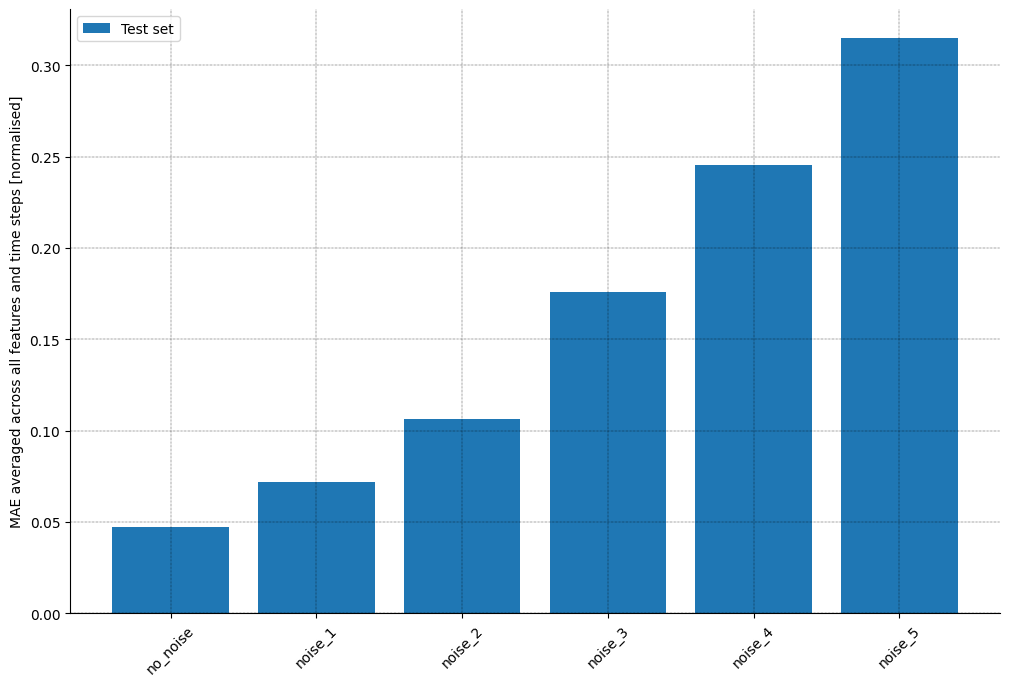

In [28]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

x = np.arange(len(noise_plot))
width = 0.5
metric_name = 'mean_absolute_error'
test_mae = [v[1] for v in noise_plot.values()]

plt.ylabel('MAE averaged across all features and time steps [normalised]')
plt.bar(x, test_mae, label='Test set')
plt.xticks(ticks=x, labels=noise_plot.keys(),
           rotation=45)
plt.grid(color='k', ls = '-.', lw = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.legend()

Clearly adding noise to the test set features has a large impact on model performance... In real life, there may be undefined noise in normal operaitons so we need to identify approaces to increase model robustness, possible approach is to add noise to the training process

## Reconstructon error with autoencoder and noise

In [30]:
autoencoder = tf.keras.models.load_model(bin_path+'/autoencoder_retrain')

In [36]:
def reconstruction_error(dataset):
  loss = []
  for x, y in dataset.take(TEST_STEPS):
    loss.append(autoencoder.evaluate(x, y, verbose=0))
  return loss

In [40]:
reconstruction_loss_0 = reconstruction_error(test_AE)
reconstruction_loss_1 = reconstruction_error(test_AE_1)
reconstruction_loss_2 = reconstruction_error(test_AE_2)
reconstruction_loss_3 = reconstruction_error(test_AE_3)
reconstruction_loss_4 = reconstruction_error(test_AE_4)
reconstruction_loss_5 = reconstruction_error(test_AE_5)

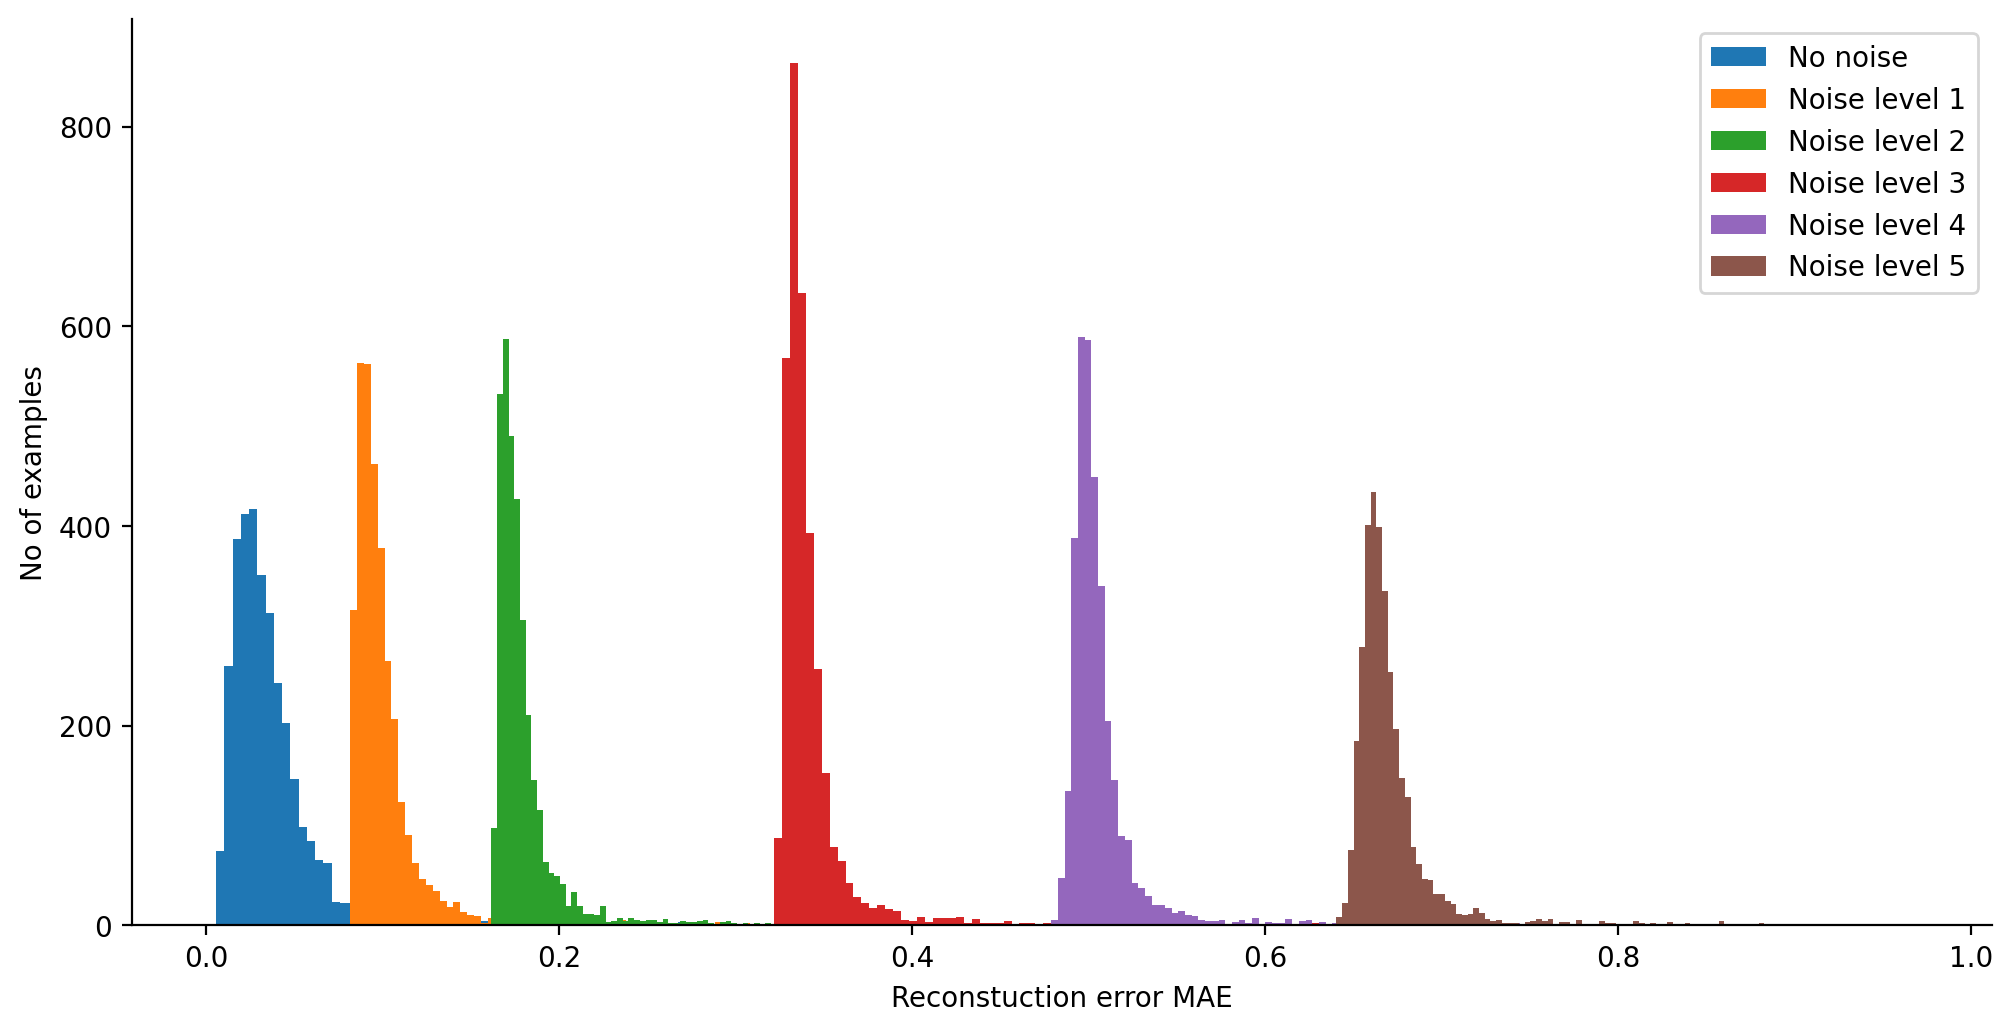

In [42]:
  fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
  plt.hist(np.array(reconstruction_loss)[:,0], bins=100, label='No noise')
  plt.hist(np.array(reconstruction_loss_1)[:,0], bins=100, label ='Noise level 1')
  plt.hist(np.array(reconstruction_loss_2)[:,0], bins=100, label ='Noise level 2')
  plt.hist(np.array(reconstruction_loss_3)[:,0], bins=100, label ='Noise level 3')
  plt.hist(np.array(reconstruction_loss_4)[:,0], bins=100, label = 'Noise level 4')
  plt.hist(np.array(reconstruction_loss_5)[:,0], bins=100, label ='Noise level 5')
  plt.xlabel("Reconstuction error MAE")
  plt.ylabel("No of examples")
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  plt.legend()
  plt.show()

## Re-evaluating test accuracy on model trained on noise level 1



In [ ]:
encoder_decoder_nose = tf.keras.models.load_model(bin_path+'/encoder_decoder_FULL_NOISE')

In [ ]:
noise_plot_noise = {}

In [ ]:
noise_plot_noise['no_noise'] = encoder_decoder_nose.evaluate(test, steps=TEST_STEPS)

3375/3375 [==============================] - 65s 19ms/step - loss: 0.0587 - mean_absolute_error: 0.0587


In [ ]:
noise_plot_noise['noise_1'] = encoder_decoder_nose.evaluate(test_noise_1, steps=TEST_STEPS)

3375/3375 [==============================] - 68s 20ms/step - loss: 0.0642 - mean_absolute_error: 0.0642


In [ ]:
noise_plot_noise['noise_2'] = encoder_decoder_nose.evaluate(test_noise_2, steps=TEST_STEPS)

3375/3375 [==============================] - 74s 22ms/step - loss: 0.0782 - mean_absolute_error: 0.0782


In [ ]:
noise_plot_noise['noise_3'] = encoder_decoder_nose.evaluate(test_noise_3, steps=TEST_STEPS)

3375/3375 [==============================] - 73s 22ms/step - loss: 0.1158 - mean_absolute_error: 0.1158


In [ ]:
noise_plot_noise['noise_4'] = encoder_decoder_nose.evaluate(test_noise_4, steps=TEST_STEPS)

3375/3375 [==============================] - 76s 23ms/step - loss: 0.1608 - mean_absolute_error: 0.1608


In [ ]:
noise_plot_noise['noise_5'] = encoder_decoder_nose.evaluate(test_noise_5, steps=TEST_STEPS)

3375/3375 [==============================] - 71s 21ms/step - loss: 0.2097 - mean_absolute_error: 0.2097


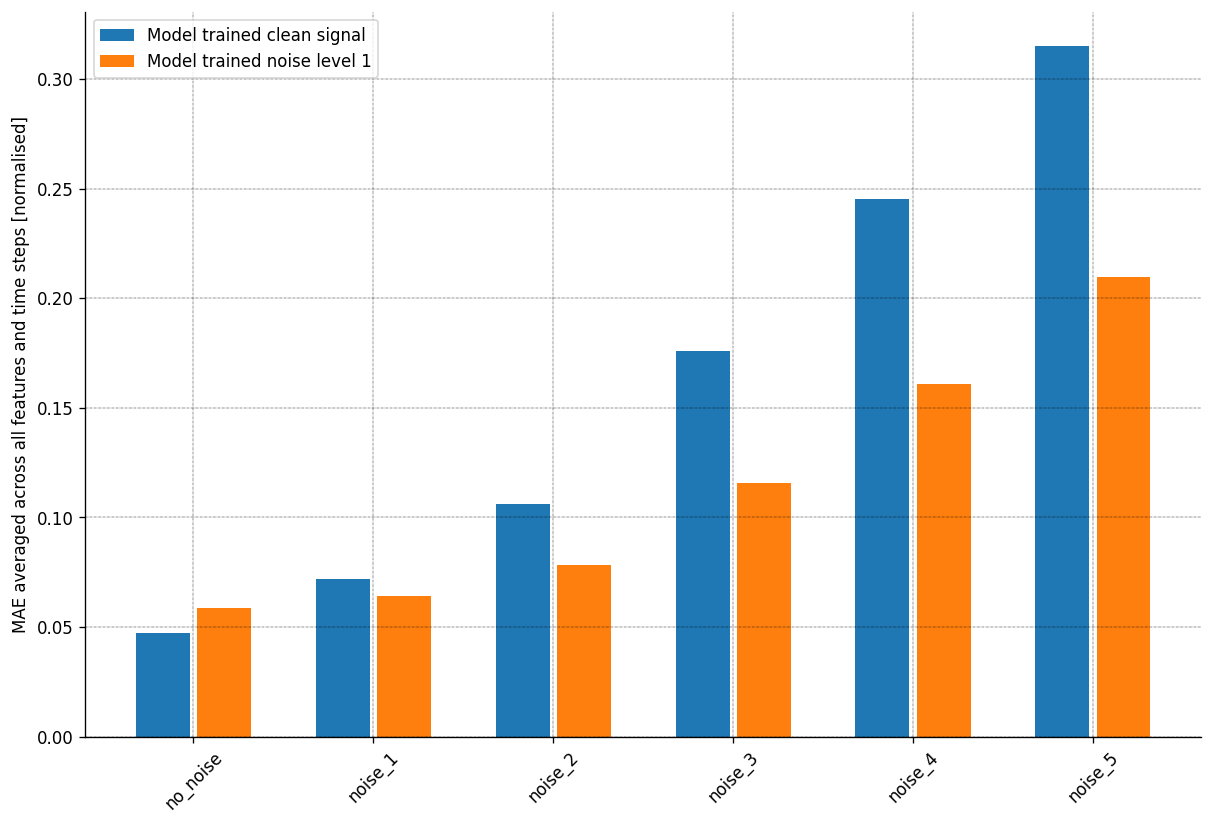

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=120)

x = np.arange(len(noise_plot_noise))
width = 0.3
metric_name = 'mean_absolute_error'
no_noise = [v[1] for v in noise_plot.values()]
noise = [v[1] for v in noise_plot_noise.values()]
plt.ylabel('MAE averaged across all features and time steps [normalised]')
plt.bar(x - 0.17, no_noise, width, label='Model trained clean signal')
plt.bar(x + 0.17, noise, width, label='Model trained noise level 1')
plt.xticks(ticks=x, labels=noise_plot.keys(),
           rotation=45)
plt.grid(color='k', ls = '-.', lw = 0.25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.legend()

Adding noise to the training process increases model robustness